# Autoencoders

## Importo bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

## Importo datos MNIST

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Definimos red

In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

## Entreno la red

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0240 - val_loss: 0.0094
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [10]:
decoded_imgs.shape

(10000, 28, 28)

## Probando el autoencoder

Imágenes originales


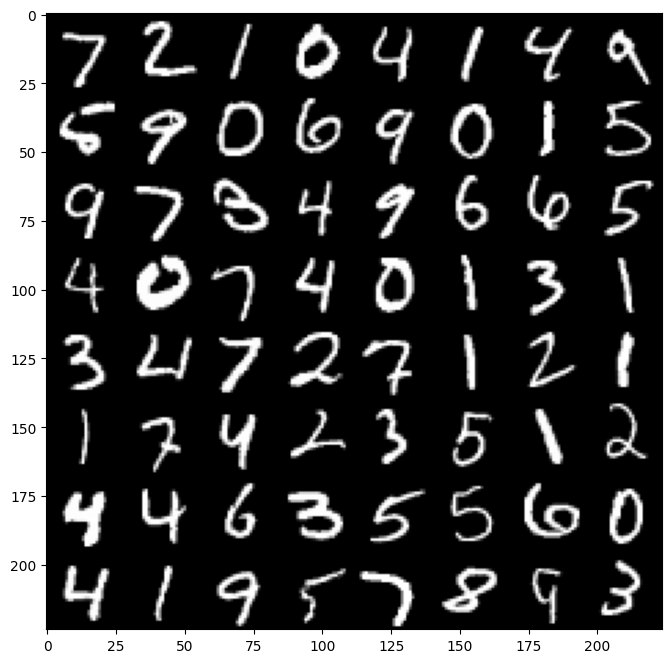

Imágenes reconstruidas


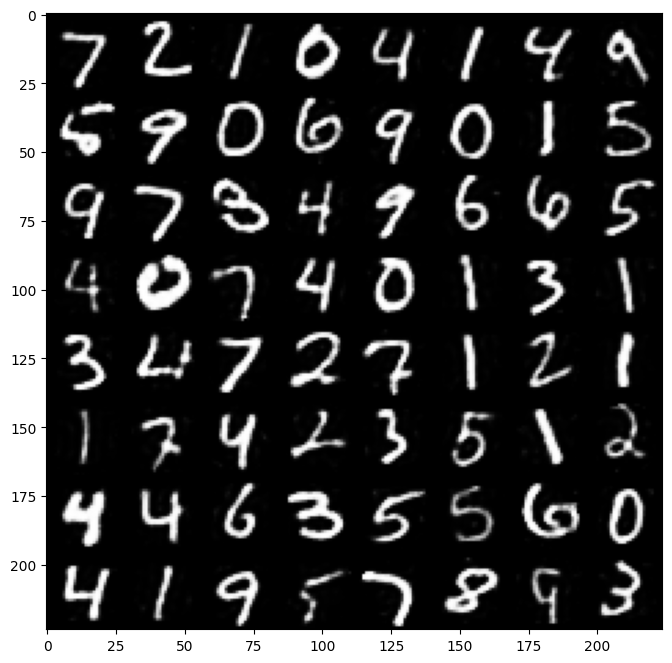

In [14]:
n = 8
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
            x_test[i*n+j].reshape([28, 28])
            
    for j in range(n):
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
            decoded_imgs[i*n+j].reshape([28, 28])

print("Imágenes originales")
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Imágenes reconstruidas")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()